# Bird or Plane?
## A Machine Learning Approach to Image Classification

### Building the Model

In [4]:
# Import Dependecies for Classifier Model

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Use Sequential Model
classifier = Sequential()

# Use 32 3x3 filters on image to find "edges"
# input images will be 64x64 pixels, RGB
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Use 2x2 matrix in pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattens array into 1 dimensional array
classifier.add(Flatten())

# Add 128 nodes
classifier.add(Dense(units = 128, activation = 'relu'))

# Add output layer
# Binary output: either a bird or a plane
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Compile Model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# We use the ImageDataGenerator class from keras

# Rescale simplifies RBG values from between 0-255 to either 1 or 0
images = ImageDataGenerator(rescale = 1./255,                     
shear_range = 0.2,                        
zoom_range = 0.2,
horizontal_flip = True,
validation_split=0.2)

training_set = images.flow_from_directory('images',
target_size = (64, 64),
class_mode = 'binary',
subset='training')

validation_set = images.flow_from_directory('images',
target_size = (64, 64),
class_mode = 'binary',
subset='validation')


Found 173 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [9]:
classifier.fit_generator(training_set,
steps_per_epoch = training_set.samples,
epochs = 1,
validation_data = validation_set,
validation_steps = validation_set.samples)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
173/173 [==============================] - 52s 302ms/step - loss: 0.2628 - acc: 0.9098 - val_loss: 0.2090 - val_acc: 0.9037


## Model Testing

In [10]:
# Save created Model
print("Name of Model?")
filename = input()
classifier.save(filename + ".h5")

Name of Model?
jeff


In [11]:
from tensorflow.keras.models import load_model

# Load premade model
print("Name of file to load?")
fileToLoad = input()
classifier = load_model(fileToLoad + ".h5")

Name of file to load?
jeff


In [12]:
import pandas as pd
df = pd.DataFrame(columns = ["Image_Name","Image_Identiy","Model_Prediction"])

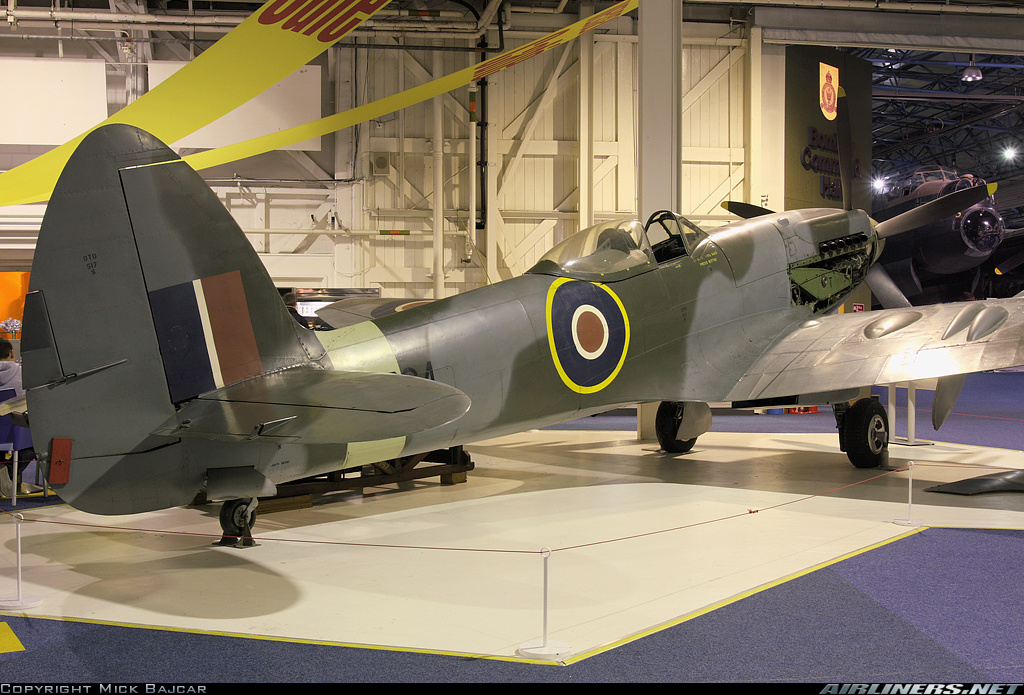

Model Prediction: Plane
Is the prediction correct? y/n
y


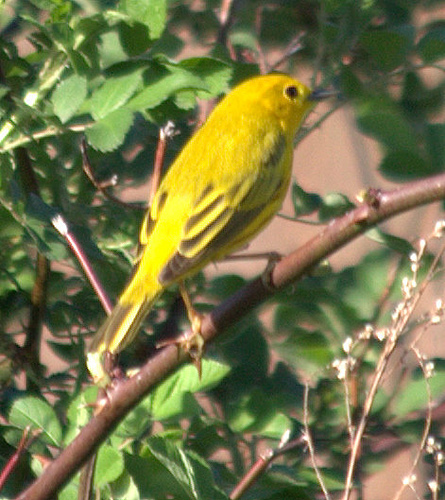

Model Prediction: Bird
Is the prediction correct? y/n
y


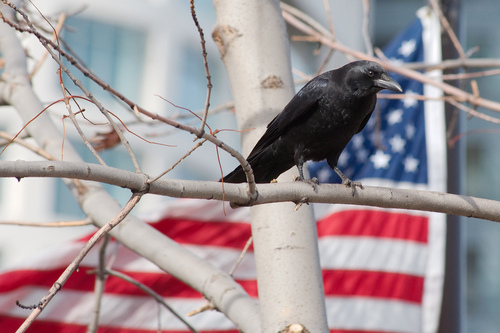

Model Prediction: Plane
Is the prediction correct? y/n
n


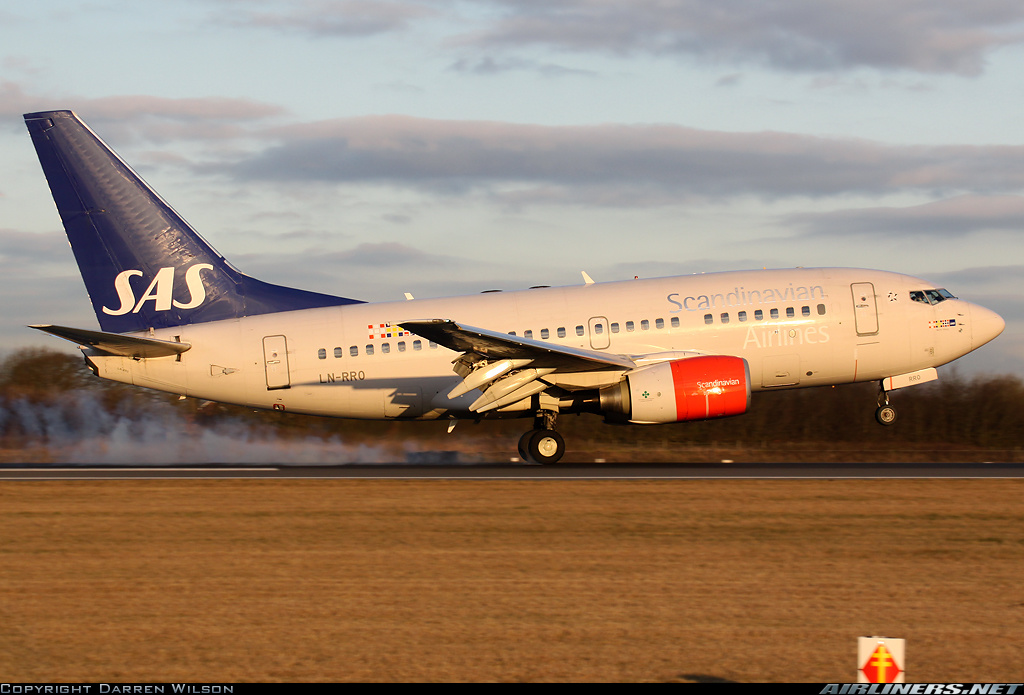

Model Prediction: Plane
Is the prediction correct? y/n
y


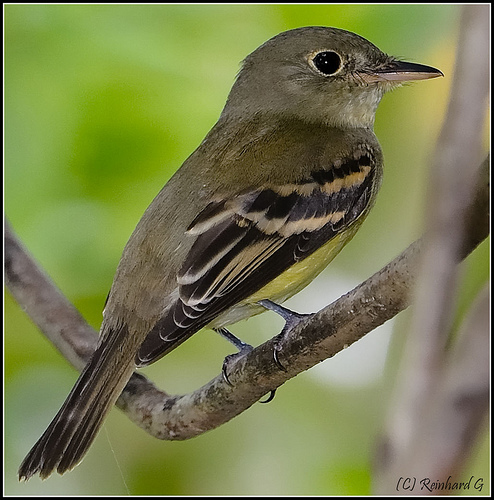

Model Prediction: Bird
Is the prediction correct? y/n
y


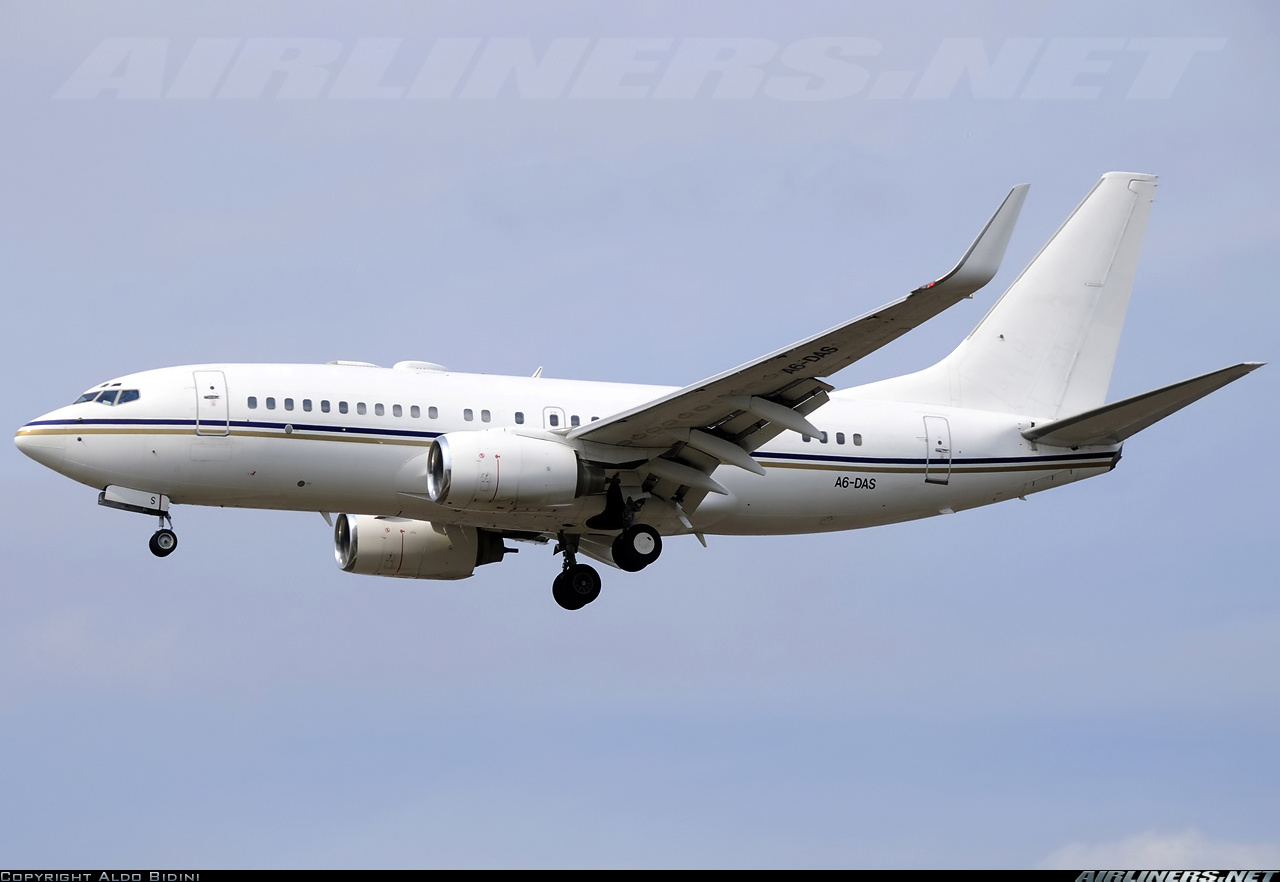

Model Prediction: Plane
Is the prediction correct? y/n
y


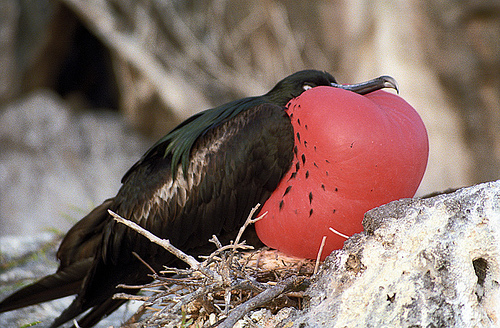

Model Prediction: Bird
Is the prediction correct? y/n
y


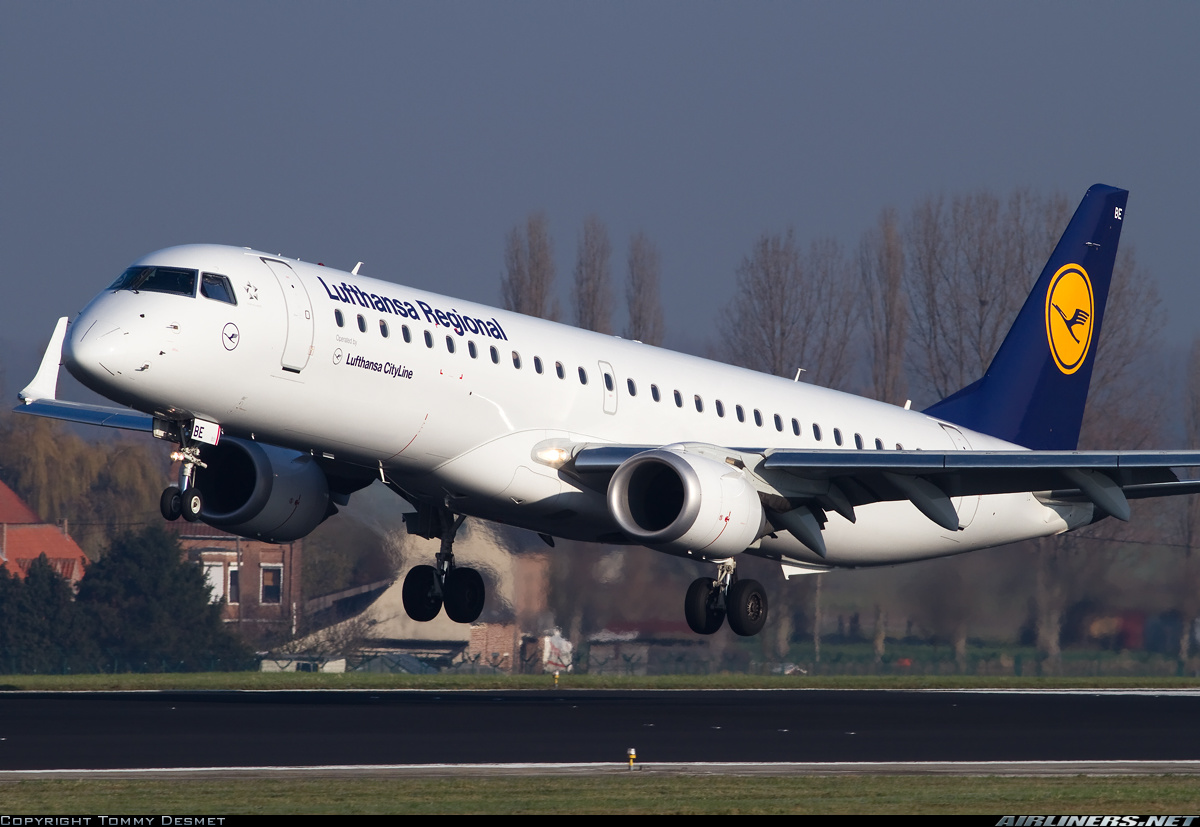

Model Prediction: Plane
Is the prediction correct? y/n
yy


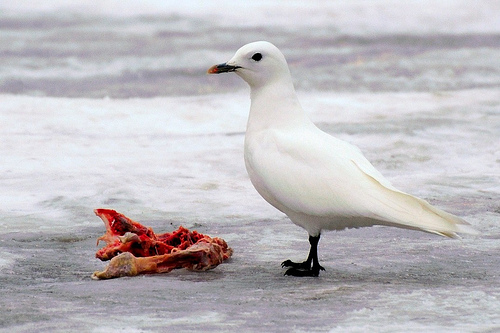

Model Prediction: Plane
Is the prediction correct? y/n
y


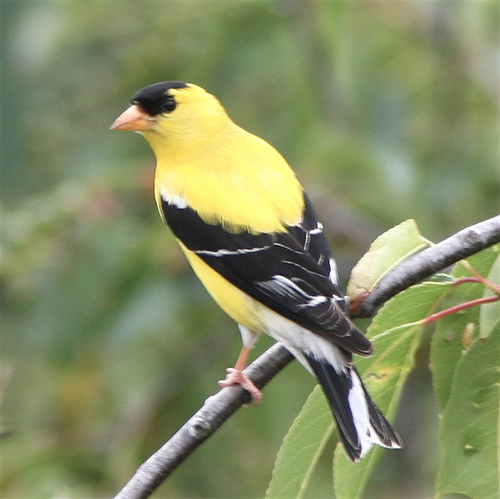

Model Prediction: Bird
Is the prediction correct? y/n
y


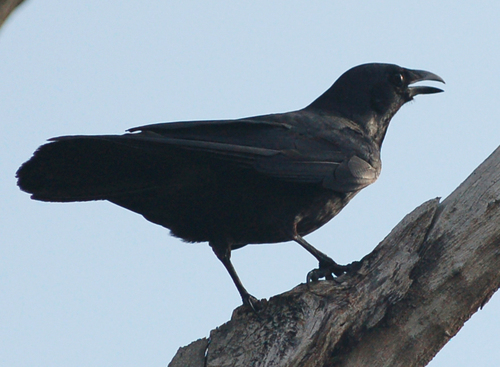

Model Prediction: Bird
Is the prediction correct? y/n
y


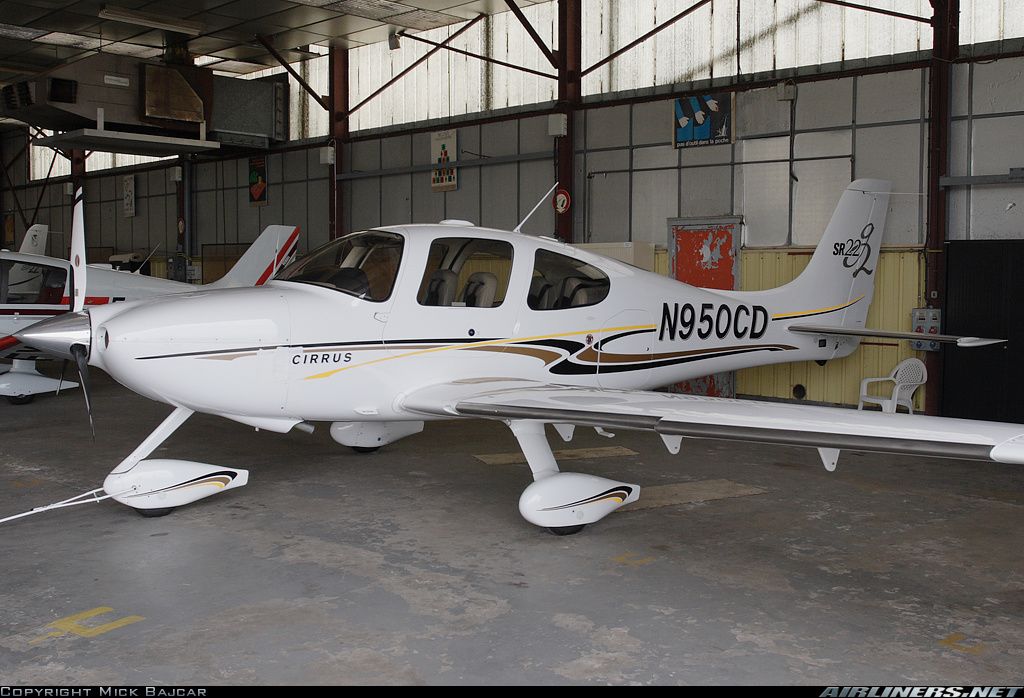

Model Prediction: Plane
Is the prediction correct? y/n
y


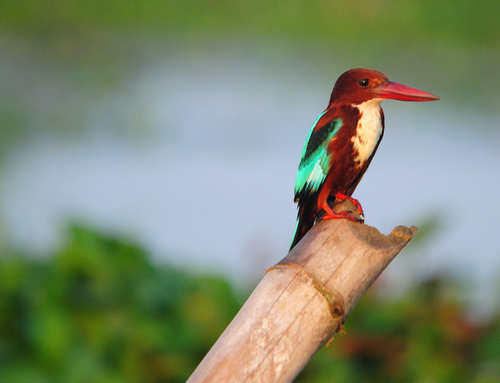

Model Prediction: Bird
Is the prediction correct? y/n
y


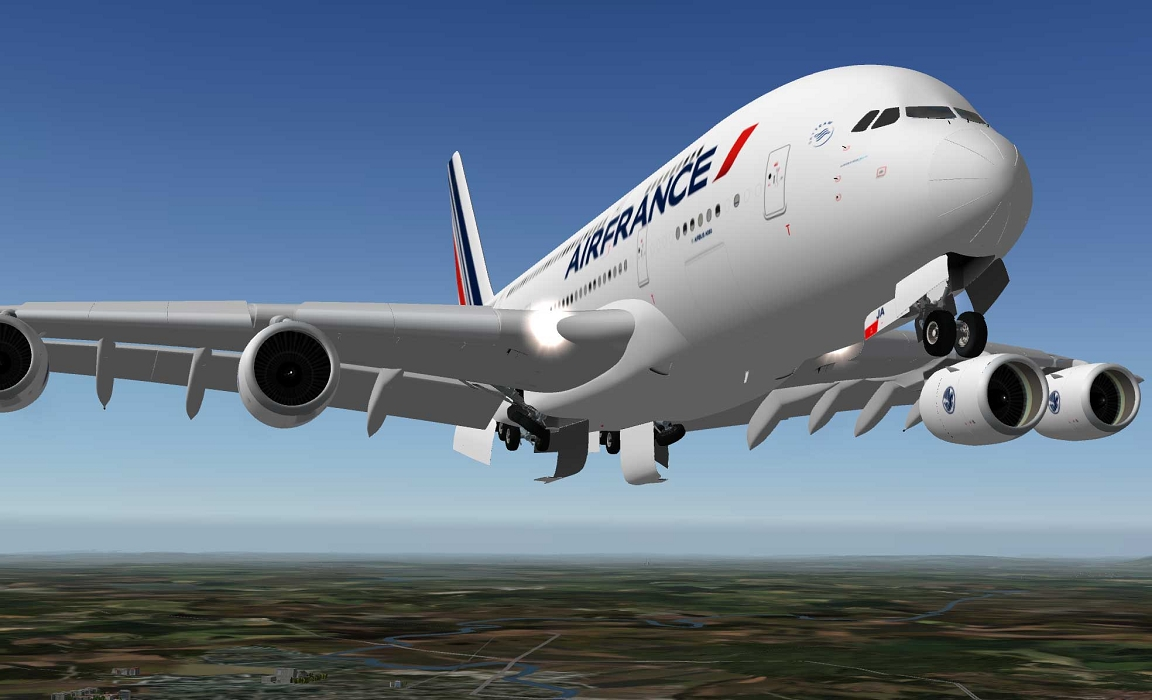

Model Prediction: Plane
Is the prediction correct? y/n
y


In [40]:
import numpy as np
import glob
from IPython.display import Image, display

# Present test images for classification
# Assume .jpg
for imageName in glob.glob('*.JPG'):
    test_image = image.load_img(imageName, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    if result[0][0] == 0:
        prediction = 'Bird'
    else:
        prediction = 'Plane'
    
    # Display Image and request actual image identity
    display(Image(filename=imageName,width=250, height=250))
    print(f'Model Prediction: {prediction}')
    print("Is the prediction correct? y/n")
    correct = input()
    if prediction == 'Bird':
        if correct == "y":
            actual = prediction
        else:
            actual = 'Plane'
    else:
        if correct == "y":
            actual = prediction
        else:
            actual = 'Bird'
            
    # Append data to dataFrame
    df = df.append({'Image_Name': imageName, 'Image_Identiy': actual, 'Model_Prediction': prediction}, ignore_index=True)
    

In [39]:
df.head(50)

,Image_Name,Image_Identiy,Model_Prediction
0,testbird.jpg,Bird,Bird
1,testplane.jpg,Plane,Plane
2,testbird.jpg,Bird,Bird
3,testplane.jpg,Bird,Plane
4,testbird.jpg,Bird,Bird
5,testplane.jpg,Plane,Plane
6,testbird.jpg,Bird,Bird
7,testplane.jpg,Plane,Plane
8,testbird.jpg,Plane,Bird
9,testplane.jpg,Bird,Plane


In [30]:
print("Name of output csv?")
csvSaveFilename = input()
df.to_csv("Output/" + csvSaveFilename + ".csv", index=False, header=True)

Name of output csv?
BirdOrPlane
